## Aula 04 - Introdução à Análise de Frequências

In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img1 = imageio.imread("imagens/pattern.png")
img2 = imageio.imread("imagens/gradient_noise.png")
img3 = imageio.imread("imagens/sin1.png")

Na aula anterior, sobre filtragem espacial, vimos que podemos aplicar filtros permitindo obter realce sobre certas características da imagem, enquanto outras características são suprimidas ou eliminadas.

Por exemplo:
1. o filtro de média suaviza a imagem removendo detalhes de transição e variações, porém realçando as cores relativas às regiões planas. 
2. o filtro diferencial extrai apenas as bordas/transições, removendo informações das regiões planas (ex. removendo a cor dos objetos

Essas diferentes características da imagem são descritas pelo comportamento da **transição das intensidades**. 

Uma região de imagem cujos pixels vizinhos possuem transição rápida entre intensidades distintas pode indicar: uma borda de um objeto, ruído, ou detalhes de um determinado objeto. Por exemplo, a imagem a seguir contém ruído e portanto seus valores possuem alta taxa de transição. Vamos visualizar a imagem e alguns pixels

(-0.5, 319.5, 319.5, -0.5)

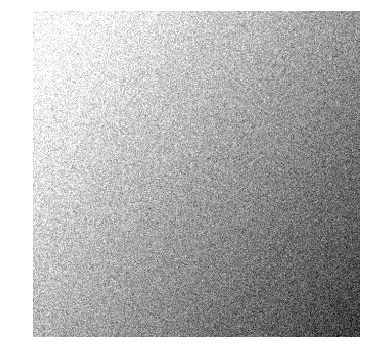

In [4]:
plt.figure(figsize=(6,6)) 
plt.imshow(img2, cmap="gray")
plt.axis('off')

In [5]:
img2[200:210, 200:210]

Image([[159, 119, 110, 154, 144, 134, 147, 121, 157, 135],
       [170, 171, 151, 154, 152, 141, 141, 126, 131, 160],
       [150, 163, 133, 147, 153, 130, 133, 148, 158, 145],
       [153, 136, 128, 134, 114, 141, 136, 151, 136, 128],
       [139, 137, 115, 130, 136, 145, 137, 118, 171, 151],
       [166, 130, 120, 197, 146, 151, 130, 146, 132, 191],
       [128, 137, 130, 109, 130, 167, 162, 151, 120, 153],
       [156, 140, 134, 120, 147, 154, 142, 120, 135, 130],
       [136, 141, 141, 106, 122, 141, 128, 120, 170, 108],
       [144, 157, 178, 129, 131, 146, 130, 135, 136, 140]], dtype=uint8)

Note como cada pixel é bastante diferente um do outro. Em contraste, a imagem a seguir é caracterizada por regiões sem variação, ou com uma variação suave.

(-0.5, 255.5, 255.5, -0.5)

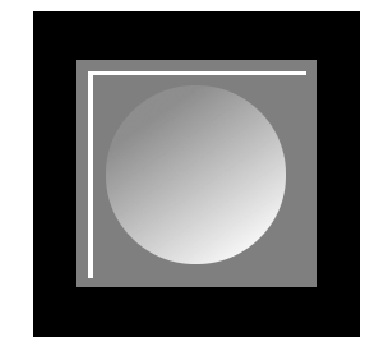

In [6]:
plt.figure(figsize=(6,6)) 
plt.imshow(img1, cmap="gray")
plt.axis('off')

In [7]:
img1[200:210, 200:210]

Image([[127, 127, 127, 127, 127, 127, 127, 127, 127, 127],
       [127, 127, 127, 127, 127, 127, 127, 127, 127, 127],
       [127, 127, 127, 127, 127, 127, 127, 127, 127, 127],
       [127, 127, 127, 127, 127, 127, 127, 127, 127, 127],
       [127, 127, 127, 127, 127, 127, 127, 127, 127, 127],
       [127, 127, 127, 127, 127, 127, 127, 127, 127, 127],
       [127, 127, 127, 127, 127, 127, 127, 127, 127, 127],
       [127, 127, 127, 127, 127, 127, 127, 127, 127, 127],
       [127, 127, 127, 127, 127, 127, 127, 127, 127, 127],
       [127, 127, 127, 127, 127, 127, 127, 127, 127, 127]], dtype=uint8)

Note como a mesma região possui valores constantes! Vamos inspecionar outra região

In [8]:
img1[120:130, 120:130]

Image([[178, 179, 179, 179, 180, 181, 181, 181, 182, 182],
       [178, 179, 179, 180, 180, 181, 181, 182, 182, 183],
       [179, 180, 180, 181, 181, 182, 182, 182, 183, 183],
       [180, 180, 181, 182, 182, 182, 183, 184, 183, 184],
       [180, 181, 182, 182, 183, 183, 184, 184, 184, 185],
       [181, 182, 183, 182, 183, 184, 184, 184, 185, 186],
       [182, 183, 183, 183, 184, 184, 185, 186, 186, 186],
       [182, 183, 183, 184, 185, 185, 185, 186, 186, 187],
       [183, 183, 185, 185, 185, 185, 186, 187, 187, 188],
       [184, 185, 185, 185, 186, 186, 186, 188, 187, 188]], dtype=uint8)

Outra imagem com transições mais suaves:


Image([[149, 152, 155, 158, 161, 164, 166, 169, 172, 174],
       [152, 155, 158, 161, 164, 167, 170, 172, 175, 177],
       [155, 158, 161, 164, 167, 170, 173, 175, 178, 181],
       [158, 161, 164, 167, 170, 173, 176, 179, 181, 184],
       [161, 164, 167, 170, 173, 176, 179, 181, 184, 187],
       [164, 167, 170, 173, 176, 179, 182, 184, 187, 189],
       [166, 170, 173, 176, 179, 182, 184, 187, 190, 192],
       [169, 172, 175, 179, 181, 184, 187, 190, 192, 195],
       [172, 175, 178, 181, 184, 187, 190, 192, 195, 198],
       [174, 177, 181, 184, 187, 189, 192, 195, 198, 200]], dtype=uint8)

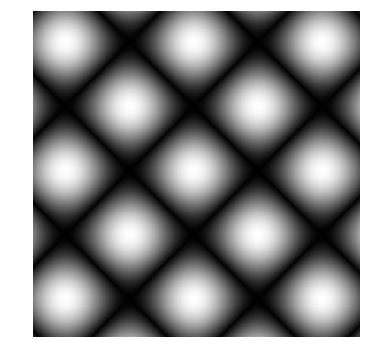

In [9]:
plt.figure(figsize=(6,6)) 
plt.imshow(img3, cmap="gray")
plt.axis('off')

img3[120:130, 120:130]

Nesse caso há variação, porém essa é suave, lenta, entre um pixel e seus vizinhos. 

### Análise de Frequências

Uma forma de ver essas características é na forma de **frequências**. Intuitivamente, as frequências mais baixas estão relacionadas a transições suaves, enquanto frequências altas estão relacionadas a transições bruscas.

Para analisar as frequências presentes em um sinal (ou imagem) utilizamos a **Transformada de Fourier**

Nesse documento vamos estudar a Transformada de Fourier em uma dimensão, comumente aplicada a sinais no tempo, pois nesse cenário sua aplicação é mais intuitiva. Posteriormente, retornaremos à sua aplicação em imagens, que na prática são sinais 2D (bidimensionais)!

Vamos começar com um vetor (1D) contendo 128 elementos, obtido da coordenada $x=100$ da imagem, e a seguir exibi-lo usando um gráfico (*plot*)


In [10]:
vet1 = img3[100, 64:192]
vet1

Image([118, 116, 114, 112, 110, 108, 106, 103, 101,  98,  96,  93,  90,
        87,  84,  81,  78,  75,  71,  68,  65,  61,  58,  54,  50,  47,
        43,  39,  35,  31,  27,  24,  20,  16,  12,   8,   4,   3,   7,
        11,  15,  19,  23,  27,  31,  35,  38,  42,  46,  50,  53,  57,
        60,  64,  67,  71,  74,  77,  80,  83,  86,  89,  92,  95,  97,
       100, 102, 104, 107, 109, 111, 113, 114, 116, 118, 119, 120, 122,
       123, 124, 124, 125, 126, 126, 127, 127, 127, 127, 127, 127, 126,
       126, 125, 124, 124, 123, 122, 120, 119, 118, 116, 115, 113, 111,
       109, 107, 105, 102, 100,  97,  95,  92,  89,  86,  84,  80,  77,
        74,  71,  68,  64,  61,  57,  54,  50,  46,  43,  39], dtype=uint8)

In [11]:
vet1.shape


(128,)

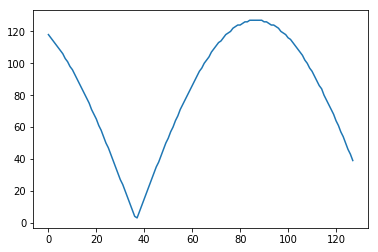

In [12]:
plt.plot(vet1)

Apenas observando o gráfico acima, como você diria que se comporta a transição dos valores? De forma rápida/brusca ou de forma lenta/suave?

Vamos agora obter um vetor de mesmo tamanho, porém agora da imagem ruidosa:

In [13]:
vet2 = img2[100, 64:192]
vet2

Image([224, 208, 213, 196, 255, 210, 210, 232, 235, 212, 191, 210, 220,
       197, 184, 214, 232, 213, 215, 251, 198, 203, 201, 233, 234, 225,
       165, 209, 218, 200, 211, 213, 187, 230, 228, 205, 181, 207, 222,
       198, 203, 163, 196, 224, 187, 232, 173, 229, 197, 204, 198, 210,
       196, 224, 194, 190, 219, 195, 193, 192, 191, 191, 190, 246, 182,
       215, 193, 186, 200, 213, 155, 235, 186, 177, 181, 166, 175, 164,
       244, 189, 185, 223, 158, 199, 186, 175, 195, 158, 194, 205, 224,
       178, 173, 195, 159, 177, 195, 177, 194, 167, 162, 154, 157, 187,
       212, 203, 152, 198, 163, 194, 204, 201, 161, 193, 181, 198, 174,
       169, 200, 170, 167, 150, 182, 202, 191, 179, 177, 174], dtype=uint8)

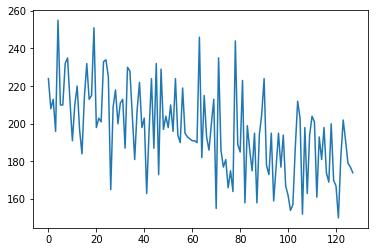

In [14]:
plt.plot(vet2)

#### Note como há uma transição/modificação brusca entre os valores de um valor e seu vizinho.

Para estudar esses diferentes padrões de transição, podemos pensar em termos das funções matemática *mais simples possível* e que permitam representar variação.

Essas funções são o as senoidais: **SENO** e **COSSENO**.

Uma função senoidal com baixa frequência tem variação suave, enquanto uma função com alta frequência, variação brusca. Vejamos abaixo uma função seno avaliada no intervalo entre 0 e 2, considerando passo 0.01.

Como queremos avaliar as características de frequência (em termos de ciclos por segundo - Hz) usamos $2 \pi$ no argumento e então a variável *t* abaixo passa a significar o tempo em segundos.


In [15]:
t = np.arange(0, 1, 0.005)
t.shape

(200,)

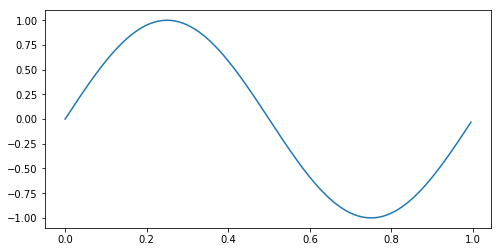

In [16]:
pi = 3.1415
fsin1 = np.sin(t * (2*pi))

plt.figure(figsize=(8,4)) 
plt.plot(t, fsin1)

Note como a função seno possui exatamente 1 picos (1 onda senoidal) ao longo de 1 segundo, ou seja sua **frequência é de 1 Hz**.

Vamos agora alterar o parâmetro para aumentar a frequência para 3 e depois 10 Hz

Text(0.5,1,'seno em 3Hz')

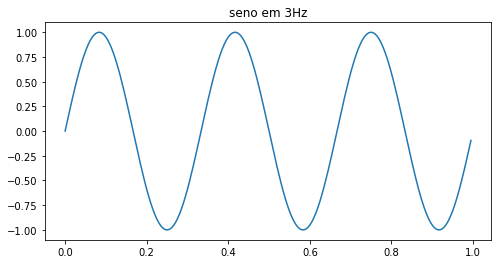

In [17]:
Fs = 3 # Parametro de Frequencia
fsin3 = np.sin(t * (2*pi) * Fs)

plt.figure(figsize=(8,4)) 
plt.plot(t, fsin3)
plt.title("seno em 3Hz")

Text(0.5,1,'seno em 10Hz')

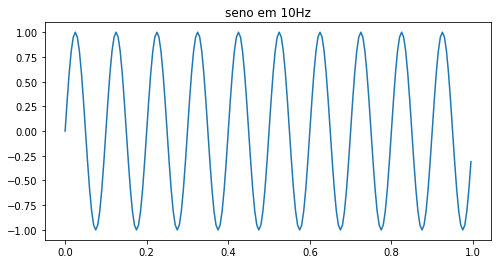

In [18]:
Fs = 10 # Parametro de Frequencia
fsin10 = np.sin(t * (2*pi) * Fs)

plt.figure(figsize=(8,4)) 
plt.plot(t, fsin10)
plt.title("seno em 10Hz")

Estamos avaliando a função seno com diferentes *características de frequência*.

Tente fazer a correspondência entre fsin1 (seno de 1Hz), fsin10 (seno de 10Hz) e os vetores 1 e 2 exibidos anteriormente. Se você tivesse que apontar similaridades, quais seriam?

Certamente notamos que `vet1` é mais parecido com `fsin1`, enquanto `vet2` é mais similar a `fsin10` com relação ao padrão de frequência!

De uma forma grosseira, é isso que a **Análise de Fourier** calcula: qual é a contribuição das diferentes frequências (em Hz) para a formação de um sinal. De forma um pouco mais precisa, considera que um sinal pode ser *escrito utilizando a soma de senos e cossenos em diferentes frequências*.

Note que, de fato podemos obter sinais bastante complexos apenas pela combinação linear de senos e cossenos em diferentes frequências. Veja abaixo um exemplo


In [19]:
my_signal1 = 1*np.sin(t*(2*pi) * 2) + 0.6*np.cos(t*(2*pi) * 8) + 0.4*np.cos(t*(2*pi) * 16) + 0.3*np.sin(t*(2*pi) * 32)

Text(0.5,1,'sinal composto pela soma de 2 senos e 2 cossenos')

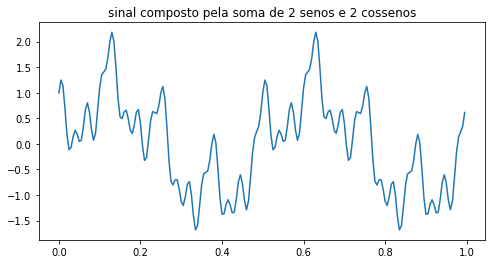

In [20]:
plt.figure(figsize=(8,4)) 
plt.plot(t, my_signal1)
plt.title("sinal composto pela soma de 2 senos e 2 cossenos")

Nesse ponto você poderia perguntar: mas porque usar o cosseno? O seno não é suficiente? É que o cosseno provê um *deslocamento diferente* com relação ao seno. Veja como há diferença se usamos apenas os senos:

Text(0.5,1,'sinal composto pela soma de 4 senos')

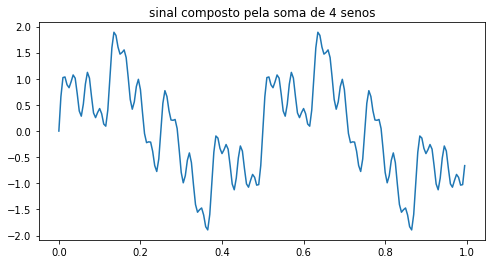

In [21]:
my_signal2 = 1*np.sin(t*(2*pi) * 2) + 0.6*np.sin(t*(2*pi) * 8) + 0.4*np.sin(t*(2*pi) * 16) + 0.3*np.sin(t*(2*pi) * 32)
plt.figure(figsize=(8,4)) 
plt.plot(t, my_signal2)
plt.title("sinal composto pela soma de 4 senos")

Utilizaremos o seno e cosseno como *funções de base* para escrever sinais. Calculando qual a amplitude de cada seno e cosseno nas diferentes frequências, poderemos aproximar qualquer sinal.

Veja que na função anterior usamos:
`my_signal1 = 1*np.sin(t*(2*pi) * 2) + 0.6*np.cos(t*(2*pi) * 8) + 0.4*np.cos(t*(2*pi) * 16) + 0.3*np.sin(t*(2*pi) * 32)`

Aqui *sabemos* que o sinal é uma soma de:
* um seno com frequência 2 e amplitude 1
* um cosseno com frequência 8 e amplitude 0.6
* um cosseno com frequência 16 e amplitude 0.4
* um seno com frequência 32 e amplitude 0.3

Para verificar qual tipo de função compõe o sinal podemos multiplicar ponto a ponto e somar o resultado. Por exemplo, vamos multiplicar o sinal 1 com senos e cossenos nas frequências 1, 2, 3 e 4, e ver o resultado.

Ao fazer a soma dos produtos estamos tentando encontrar o quão parecidos os sinais são.

In [24]:
# fazemos o produto do sinal pelo seno com frequencia 1, e somamos todos os elementos:
np.sum( my_signal1 * np.sin(t*2*pi*1) )

8.140002314893646e-05

In [25]:
# agora vamos fazer isso para frequencias de 1 ate 4:
for Freq in range(1,5):
    SomaProdSeno = np.sum( my_signal1 * np.sin(t*2*pi*Freq) )
    SomaProdCoss = np.sum( my_signal1 * np.cos(t*2*pi*Freq) )
    print("Frequencia %d" % Freq)
    print("\tSeno    = %.5f" % SomaProdSeno)
    print("\tCosseno = %.5f" % SomaProdCoss)

Frequencia 1
	Seno    = 0.00008
	Cosseno = -0.00475
Frequencia 2
	Seno    = 100.00311
	Cosseno = -0.00475
Frequencia 3
	Seno    = 0.00024
	Cosseno = -0.00474
Frequencia 4
	Seno    = 0.00033
	Cosseno = -0.00474


Note os valores acima. Quais deles representa a maior magnitude? Veja que a maior magnitude é referente ao Seno com frequência 2, exatamente conforme deveria ser pois realmente usamos essa função para compor o sinal.

Os demais possuem valores pequenos, ao redor de zero, indicando que aquela onda senoidal não compõe o sinal.

Podemos visualizar o quão correspondentes são os sinais (a partir da multiplicação), conforme abaixo:


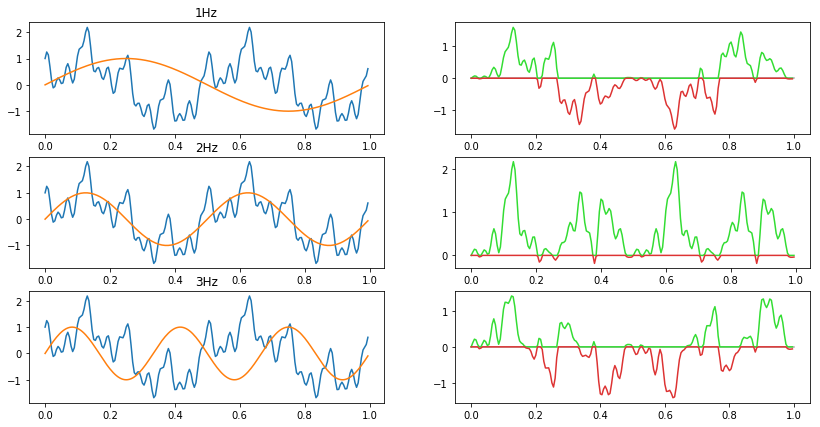

In [58]:
plt.figure(figsize=(14,7)) 
plt.subplot(321)
plt.plot(t, my_signal1)
plt.plot(t, np.sin(t*2*pi*1))
plt.title("1Hz")
plt.subplot(322)
plt.plot((0, 1), (0, 0), color='#aaaaaa')
prod1 = my_signal1 * np.sin(t*2*pi*1)

prod1pos = np.zeros(prod1.shape)
prod1pos[np.where(prod1>=0)] = prod1[np.where(prod1>=0)]
prod1neg = np.zeros(prod1.shape)
prod1neg[np.where(prod1<0)] = prod1[np.where(prod1<0)]
plt.plot(t, prod1pos, color='#33dd33')
plt.plot(t, prod1neg, color='#dd3333')

plt.subplot(323)
plt.plot(t, my_signal1)
plt.plot(t, np.sin(t*2*pi*2))
plt.title("2Hz")
plt.subplot(324)
prod2 = my_signal1 * np.sin(t*2*pi*2)
prod2pos = np.zeros(prod2.shape)
prod2pos[np.where(prod2>=0)] = prod2[np.where(prod2>=0)]
prod2neg = np.zeros(prod2.shape)
prod2neg[np.where(prod2<0)] = prod2[np.where(prod2<0)]
plt.plot(t, prod2pos, color='#33dd33')
plt.plot(t, prod2neg, color='#dd3333')

plt.subplot(325)
plt.plot(t, my_signal1)
plt.plot(t, np.sin(t*2*pi*3))
plt.title("3Hz")
plt.subplot(326)
plt.plot((0, 1), (0, 0), color='#aaaaaa')
prod3 = my_signal1 * np.sin(t*2*pi*3)
prod3pos = np.zeros(prod3.shape)
prod3pos[np.where(prod3>=0)] = prod3[np.where(prod3>=0)]
prod3neg = np.zeros(prod3.shape)
prod3neg[np.where(prod3<0)] = prod3[np.where(prod3<0)]
plt.plot(t, prod3pos, color='#33dd33')
plt.plot(t, prod3neg, color='#dd3333')

Note nos gráficos acima que a correspondência entre o sinal e a frequência 1 ocorre em alguns pontos (produz valores positivos), se cancela em outros, e gera valores negativos. Ao somar, temos um valor baixo pois os negativos cancelam os positivos. No lado direito em verde mostramos os valores maiores que zero e em vermelho os valores menores do que zero.

Repare que para 1Hz e 3Hz, há uma massa equivalente de valores positivos e negativos.

Já no caso da frequência 2Hz, a maior parte do gráfico do produto se encontra acima da linha do zero, ao somar, resulta em amplitude maior para a frequência 2 Hz

Vamos agora computar para os valores até a frequência 32, para confirmar essa hipótese.

In [59]:
# agora vamos fazer isso para frequencias de 1 ate 32:
print("Freq.\tSeno\tCosseno")
for Freq in range(1,33):
    SomaProdSeno = np.sum( my_signal1 * np.sin(t*2*pi*Freq) )
    SomaProdCoss = np.sum( my_signal1 * np.cos(t*2*pi*Freq) )
    print("%d\t%.3f\t%.3f" % (Freq, SomaProdSeno, SomaProdCoss))

Freq.	Seno	Cosseno
1	0.000	-0.005
2	100.003	-0.005
3	0.000	-0.005
4	0.000	-0.005
5	0.000	-0.005
6	0.000	-0.005
7	0.001	-0.005
8	0.001	59.997
9	0.001	-0.005
10	0.001	-0.005
11	0.001	-0.005
12	0.001	-0.005
13	0.001	-0.005
14	0.001	-0.005
15	0.001	-0.005
16	0.001	39.997
17	0.001	-0.005
18	0.001	-0.005
19	0.002	-0.005
20	0.002	-0.005
21	0.002	-0.005
22	0.002	-0.005
23	0.002	-0.004
24	0.002	-0.004
25	0.002	-0.004
26	0.002	-0.004
27	0.002	-0.004
28	0.002	-0.004
29	0.002	-0.004
30	0.002	-0.004
31	0.003	-0.004
32	30.003	-0.004


Note acima, que as maiores magnitudes estão relacionadas às frequências 2, 8, 16 e 32, que formam o sinal. Além disso, a magnitude também nos informa a contribuição daquela frequência. Por exemplo a frequência 2 tem magnitude 100, enquanto a frequência 32 tem magnitude 30.

Vamos implementar uma função simples que seja capaz de retornar a frequência relacionada à maior amplitude de um sinal, e testá-la com os vetores obtidos das imagens.

In [60]:
def maximum_frequencies(A):
    
    # vamos computar frequencias ate metade do tamanho do sinal
    n = int(A.shape[0]/2)
    t = np.linspace(0, 1, n*2)
    magnit = np.empty(n)
    for f in range(2,n):
        SomaProdSeno = np.sum( A * np.sin(t*2*pi*f) )
        SomaProdCoss = np.sum( A * np.cos(t*2*pi*f) )
        magnit[f] = SomaProdSeno + SomaProdCoss
                      
    return np.argmax(magnit)

In [61]:
# testando com nosso sinal conhecido
print(maximum_frequencies(my_signal1))

1


2


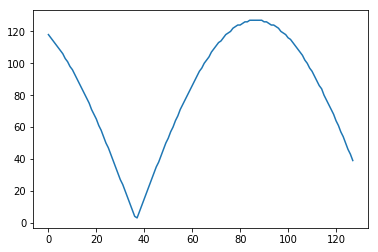

In [62]:
plt.plot(vet1)
print(maximum_frequencies(vet1))

27


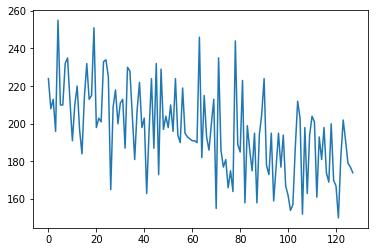

In [63]:
plt.plot(vet2)
print(maximum_frequencies(vet2))

Note como o vetor1 é caracterizado por uma frequência mais baixa (2 Hz), enquanto o segundo por frequência mais alta (27 Hz).

A **Transformada de Fourier** é uma ferramenta para esse tipo de análise, e que, além de permitir avaliar quais frequências compõem um sinal ou imagem, ainda permite processá-los a partir do projeto de filtros em frequência, conforme veremos a seguir.